Harguna Sood (hs3159)  
AML HW - 2  
Task - 1  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as lgr
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.svm import LinearSVC 
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv("/Users/hargunasood/Downloads/dataset_31_credit-g.csv")

Task 1.1  
Continuous features:    
duration, credit_amount, installment_commitment, residence_since, age, existing_credits, num_dependents  

Categorical features:    
class (target), checking_status, credit_history, purpose, savings_status, employment, personal_status, other_parties, property_magnitude, other_payment_plans, housing, job, own_telephone, foreign_worker

Task 1.2
Visualising distribution of all continuous features:

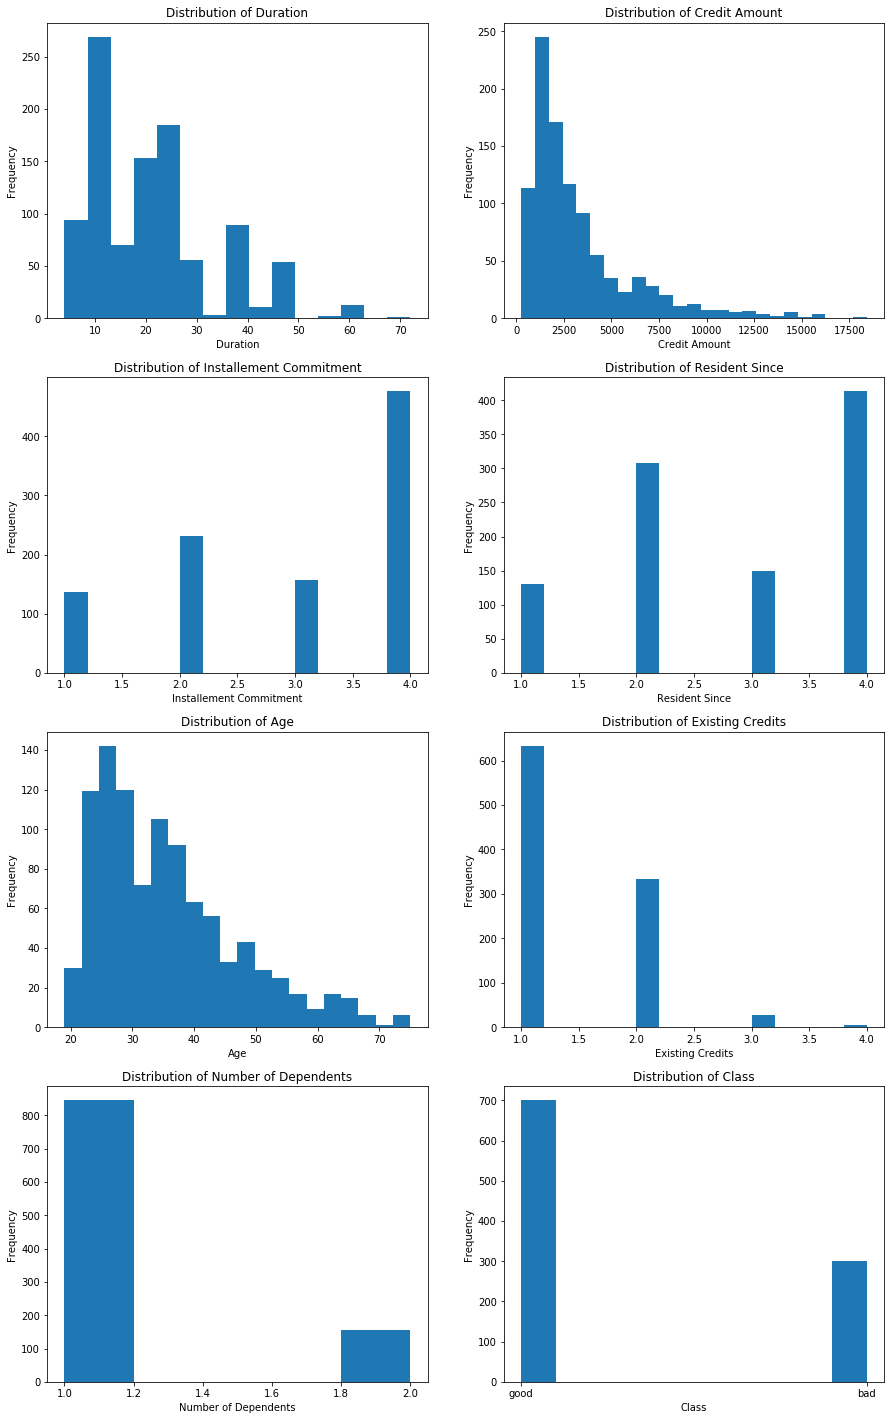

In [4]:
fig, ax = plt.subplots(4,2, figsize=(15,25))
ax[0,0].hist(data.loc[:,"duration"], bins=15);
ax[0,0].set_xlabel("Duration");
ax[0,0].set_ylabel("Frequency");
ax[0,0].set_title("Distribution of Duration");

ax[0,1].hist(data.loc[:,"credit_amount"], bins=25);
ax[0,1].set_xlabel("Credit Amount");
ax[0,1].set_ylabel("Frequency");
ax[0,1].set_title("Distribution of Credit Amount");

ax[1,0].hist(data.loc[:,"installment_commitment"], bins=15);
ax[1,0].set_xlabel("Installement Commitment");
ax[1,0].set_ylabel("Frequency");
ax[1,0].set_title("Distribution of Installement Commitment");

ax[1,1].hist(data.loc[:,"residence_since"], bins=15);
ax[1,1].set_xlabel("Resident Since");
ax[1,1].set_ylabel("Frequency");
ax[1,1].set_title("Distribution of Resident Since");

ax[2,0].hist(data.loc[:,"age"], bins=20);
ax[2,0].set_xlabel("Age");
ax[2,0].set_ylabel("Frequency");
ax[2,0].set_title("Distribution of Age");

ax[2,1].hist(data.loc[:,"existing_credits"], bins=15);
ax[2,1].set_xlabel("Existing Credits");
ax[2,1].set_ylabel("Frequency");
ax[2,1].set_title("Distribution of Existing Credits");

ax[3,0].hist(data.loc[:,"num_dependents"], bins=5);
ax[3,0].set_xlabel("Number of Dependents");
ax[3,0].set_ylabel("Frequency");
ax[3,0].set_title("Distribution of Number of Dependents");

ax[3,1].hist(data.loc[:,"class"]);
ax[3,1].set_xlabel("Class");
ax[3,1].set_ylabel("Frequency");
ax[3,1].set_title("Distribution of Class");

Task 1.3

In [5]:
train_data, test_data = tts(data, test_size=0.2, random_state=1)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
print(train_data.shape, test_data.shape)

(800, 21) (200, 21)


In [6]:
train_data, cv_data = tts(train_data, test_size=0.1)
train_data = train_data.reset_index(drop=True)
cv_data = cv_data.reset_index(drop=True)
print(train_data.shape, cv_data.shape)

(720, 21) (80, 21)


Categorical Treatment

In [7]:
from sklearn import preprocessing

cat_cols = ["checking_status", "credit_history", "purpose", "savings_status", "employment", "personal_status", "other_parties", "property_magnitude", "other_payment_plans", "housing", "job", "own_telephone", "foreign_worker"]

ohe = preprocessing.OneHotEncoder(sparse=False).fit(train_data[cat_cols])

temp = pd.DataFrame(ohe.transform(train_data[cat_cols]))
train_data2 = train_data.drop(cat_cols, axis = 1)
train_data2 = pd.concat([train_data2, temp], axis = 1)

temp = pd.DataFrame(ohe.transform(cv_data[cat_cols]))
cv_data2 = cv_data.drop(cat_cols, axis = 1)
cv_data2 = pd.concat([cv_data2, temp], axis = 1)

print(train_data2.shape, cv_data2.shape)

(720, 62) (80, 62)


Continuous Treatment

In [8]:
cont_cols = ["duration", "credit_amount", "installment_commitment", "residence_since", "age", "existing_credits", "num_dependents"]

scaler = preprocessing.StandardScaler().fit(train_data2[cont_cols])

train_data2[cont_cols] = scaler.transform(train_data2[cont_cols])
cv_data2[cont_cols] = scaler.transform(cv_data2[cont_cols])

print(train_data2.shape, cv_data2.shape)

(720, 62) (80, 62)


In [9]:
train_data_x = train_data2.drop(["class"], axis=1)
train_data_y = train_data2.loc[:, "class"]

cv_data_x = cv_data2.drop(["class"], axis=1)
cv_data_y = cv_data2.loc[:, "class"]

Model Fitting

In [10]:
model = lgr(solver="liblinear").fit(train_data_x, list(train_data_y))

Scoring

In [11]:
f1_score(list(cv_data_y), list(model.predict(cv_data_x)), pos_label='good')

0.8124999999999999

Task 1.4

In [12]:
train_data, test_data = tts(data, test_size=0.2, random_state=1)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
print(train_data.shape, test_data.shape)

(800, 21) (200, 21)


In [13]:
test_data_x = test_data.drop(["class"], axis=1)
test_data_y = test_data.loc[:, "class"]

train_data_x = train_data.drop(["class"], axis=1)
train_data_y = train_data.loc[:, "class"]


Categorical Treatment

In [14]:
cat_cols = ["checking_status", "credit_history", "purpose", "savings_status", "employment", "personal_status", "other_parties", "property_magnitude", "other_payment_plans", "housing", "job", "own_telephone", "foreign_worker"]

ohe = preprocessing.OneHotEncoder(sparse=False)
preprocess = make_column_transformer((ohe, cat_cols))
logr = make_pipeline(preprocess, LogisticRegression(solver="lbfgs"))
svm = make_pipeline(preprocess, LinearSVC())
knn = make_pipeline(preprocess, KNeighborsClassifier())

Model Evalutions

In [15]:
f1_scr = make_scorer(f1_score, pos_label="good")

print("Logistic Regression:", np.mean(cross_val_score(logr, train_data_x, train_data_y, scoring=f1_scr, cv=5)))
print("Linear SVC:", np.mean(cross_val_score(svm, train_data_x, train_data_y, scoring=f1_scr, cv=5)))
print("K Nearest Neighbors:", np.mean(cross_val_score(knn, train_data_x, train_data_y, scoring=f1_scr, cv=5)))

Logistic Regression: 0.8193313935024952
Linear SVC: 0.8159149199282464
K Nearest Neighbors: 0.8127498438345272


Ans - The results are not very different. Logistic Regression performs the best.

Continuous Treatment

In [16]:
cont_cols = ["duration", "credit_amount", "installment_commitment", "residence_since", "age", "existing_credits", "num_dependents"]

preprocess_all = make_column_transformer( (StandardScaler(), cont_cols), (ohe, cat_cols))

logr = make_pipeline(preprocess_all, LogisticRegression(solver='liblinear'))
svm = make_pipeline(preprocess_all, LinearSVC(dual=False))
knn = make_pipeline(preprocess_all, KNeighborsClassifier())

print("Logistic Regression:", np.mean(cross_val_score(logr, train_data_x, train_data_y, scoring=f1_scr, cv=5)))
print("Linear SVC:", np.mean(cross_val_score(svm, train_data_x, train_data_y, scoring=f1_scr, cv=5)))
print("K Nearest Neighbors:", np.mean(cross_val_score(knn, train_data_x, train_data_y, scoring=f1_scr, cv=5)))


Logistic Regression: 0.8255897709325991
Linear SVC: 0.820748625024881
K Nearest Neighbors: 0.8369244720160467


Ans - Scaling the continuous features improves the result in all the models 

Task 1.5

Grid Search 

In [17]:
para_grid_logr = {'logisticregression__C':[0.1, 0.01, 1, 2, 4, 5]}
grid_logr = GridSearchCV(logr, param_grid=para_grid_logr, scoring=f1_scr, cv=5)
grid_logr.fit(train_data_x, train_data_y)
print(grid_logr.best_params_)

{'logisticregression__C': 0.1}


In [18]:
para_grid_svm = {'linearsvc__C':[0.1, 0.01, 1, 2, 5]}
grid_svm = GridSearchCV(svm, param_grid=para_grid_svm, scoring=f1_scr, cv=5)
grid_svm.fit(train_data_x, train_data_y)
print(grid_svm.best_params_)

{'linearsvc__C': 0.01}


In [19]:
para_grid_knn = {'kneighborsclassifier__n_neighbors':[3, 5, 10, 15, 20, 25]}
grid_knn = GridSearchCV(knn, param_grid=para_grid_knn, scoring=f1_scr, cv=5)
grid_knn.fit(train_data_x, train_data_y)
print(grid_knn.best_params_)

{'kneighborsclassifier__n_neighbors': 20}


Model Evalutions 

In [20]:
logr_ = make_pipeline(preprocess_all, LogisticRegression(solver='liblinear', C=0.01))
svm_ = make_pipeline(preprocess_all, LinearSVC(dual=False, C=0.01))
knn_ = make_pipeline(preprocess_all, KNeighborsClassifier(n_neighbors=20))

print("Logistic Regression:", np.mean(cross_val_score(logr_, train_data_x, train_data_y, scoring=f1_scr, cv=5)))
print("Linear SVC:", np.mean(cross_val_score(svm_, train_data_x, train_data_y, scoring=f1_scr, cv=5)))
print("K Nearest Neighbors:", np.mean(cross_val_score(knn_, train_data_x, train_data_y, scoring=f1_scr, cv=5)))


Logistic Regression: 0.8262385554474653
Linear SVC: 0.8408306874399255
K Nearest Neighbors: 0.8452918353273766


Ans - Optimizing the parameters using Grid Search improved the result in all the models

Evalution on test set

In [21]:
knn_.fit(train_data_x, train_data_y);
f1_score(list(test_data_y), list(knn_.predict(test_data_x)), pos_label='good')

0.8481012658227848

In [22]:
logr_results = pd.DataFrame(grid_logr.cv_results_)
svm_results = pd.DataFrame(grid_svm.cv_results_)
knn_results = pd.DataFrame(grid_knn.cv_results_)

Visualisation of performance (Mean Score) as a function of parameter value

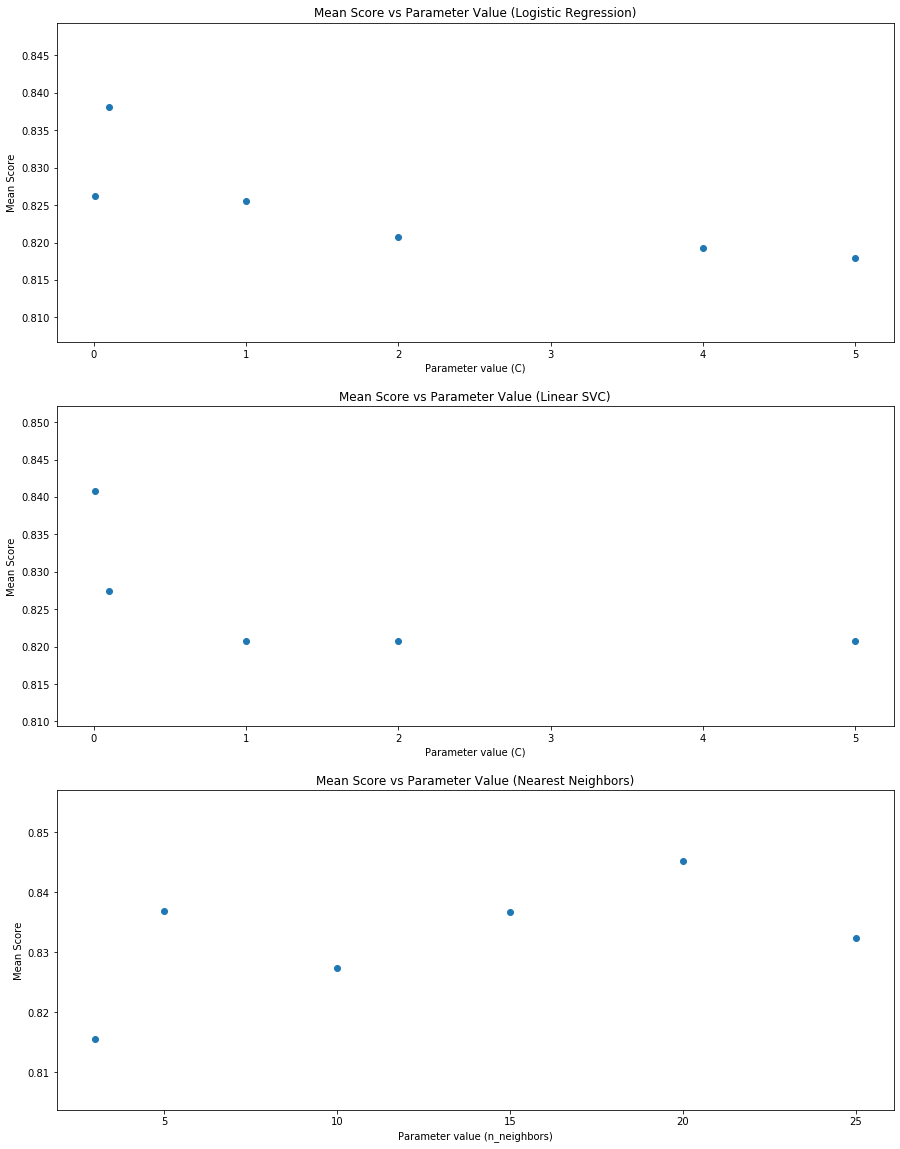

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(15,20));

ax[0].scatter(logr_results["param_logisticregression__C"], logr_results["mean_test_score"]);
ax[0].set_xlabel("Parameter value (C)");
ax[0].set_ylabel("Mean Score");
ax[0].set_title("Mean Score vs Parameter Value (Logistic Regression)");

ax[1].scatter(svm_results["param_linearsvc__C"], svm_results["mean_test_score"]);
ax[1].set_xlabel("Parameter value (C)");
ax[1].set_ylabel("Mean Score");
ax[1].set_title("Mean Score vs Parameter Value (Linear SVC)");

ax[2].scatter(knn_results["param_kneighborsclassifier__n_neighbors"], knn_results["mean_test_score"]);
ax[2].set_xlabel("Parameter value (n_neighbors)");
ax[2].set_ylabel("Mean Score");
ax[2].set_title("Mean Score vs Parameter Value (Nearest Neighbors)");


Task 1.6

Stratified -> k-Fold with shuffling

In [24]:
para_grid_logr = {'logisticregression__C':[0.1, 0.01, 1, 2, 4, 5]}
grid_logr = GridSearchCV(logr, param_grid=para_grid_logr, scoring=f1_scr, cv=KFold(n_splits=5, shuffle=True, random_state=1))
grid_logr.fit(train_data_x, train_data_y)
print(grid_logr.best_params_)

para_grid_svm = {'linearsvc__C':[0.1, 0.01, 1, 2, 5]}
grid_svm = GridSearchCV(svm, param_grid=para_grid_svm, scoring=f1_scr, cv=KFold(n_splits=5, shuffle=True, random_state=1))
grid_svm.fit(train_data_x, train_data_y)
print(grid_svm.best_params_)

para_grid_knn = {'kneighborsclassifier__n_neighbors':[3, 5, 10, 15, 20, 25]}
grid_knn = GridSearchCV(knn, param_grid=para_grid_knn, scoring=f1_scr, cv=KFold(n_splits=5, shuffle=True, random_state=1))
grid_knn.fit(train_data_x, train_data_y)
print(grid_knn.best_params_)

{'logisticregression__C': 0.1}
{'linearsvc__C': 0.01}
{'kneighborsclassifier__n_neighbors': 15}


Ans - Parameter for Nearest Neighbor changes from 20 to 15

 Changing random seed

In [25]:
para_grid_logr = {'logisticregression__C':[0.1, 0.01, 1, 2, 4, 5]}
grid_logr = GridSearchCV(logr, param_grid=para_grid_logr, scoring=f1_scr, cv=KFold(n_splits=5, shuffle=True, random_state=2))
grid_logr.fit(train_data_x, train_data_y)
print(grid_logr.best_params_)

para_grid_svm = {'linearsvc__C':[0.1, 0.01, 1, 2, 5]}
grid_svm = GridSearchCV(svm, param_grid=para_grid_svm, scoring=f1_scr, cv=KFold(n_splits=5, shuffle=True, random_state=2))
grid_svm.fit(train_data_x, train_data_y)
print(grid_svm.best_params_)

para_grid_knn = {'kneighborsclassifier__n_neighbors':[3, 5, 10, 15, 20, 25]}
grid_knn = GridSearchCV(knn, param_grid=para_grid_knn, scoring=f1_scr, cv=KFold(n_splits=5, shuffle=True, random_state=2))
grid_knn.fit(train_data_x, train_data_y)
print(grid_knn.best_params_)

{'logisticregression__C': 4}
{'linearsvc__C': 0.01}
{'kneighborsclassifier__n_neighbors': 20}


Ans - On changing the random seed, parameter for Logisitc Regression changes from 0.1 to 4, and for Nearest Neighbor from 15 to 20

 Changing random state of split

In [26]:
train_data3, test_data3 = tts(data, test_size=0.2, random_state=2)
train_data3 = train_data3.reset_index(drop=True)
test_data3 = test_data3.reset_index(drop=True)

train_data3, cv_data3 = tts(train_data3, test_size=0.1)
train_data3 = train_data3.reset_index(drop=True)

train_data3_x = train_data3.drop(["class"], axis=1)
train_data3_y = train_data3.loc[:, "class"]

In [27]:
para_grid_logr = {'logisticregression__C':[0.1, 0.01, 1, 2, 4, 5]}
grid_logr = GridSearchCV(logr, param_grid=para_grid_logr, scoring=f1_scr, cv=KFold(n_splits=5, shuffle=True, random_state=1))
grid_logr.fit(train_data_x, train_data_y)
print(grid_logr.best_params_)

para_grid_svm = {'linearsvc__C':[0.1, 0.01, 1, 2, 5]}
grid_svm = GridSearchCV(svm, param_grid=para_grid_svm, scoring=f1_scr, cv=KFold(n_splits=5, shuffle=True, random_state=1))
grid_svm.fit(train_data_x, train_data_y)
print(grid_svm.best_params_)

para_grid_knn = {'kneighborsclassifier__n_neighbors':[3, 5, 10, 15, 20, 25]}
grid_knn = GridSearchCV(knn, param_grid=para_grid_knn, scoring=f1_scr, cv=KFold(n_splits=5, shuffle=True, random_state=1))
grid_knn.fit(train_data_x, train_data_y)
print(grid_knn.best_params_)

{'logisticregression__C': 0.1}
{'linearsvc__C': 0.01}
{'kneighborsclassifier__n_neighbors': 15}


Ans - On changing the random state of split, all the parameters remain the same

Task 1.7

 Logistic Regression

In [28]:
lr = LogisticRegression(solver='liblinear', C=0.01)
logr_ = make_pipeline(preprocess_all, lr)
logr_.fit(train_data_x, train_data_y)

x = ohe.fit(train_data_x[cat_cols])
cols = list(x.get_feature_names())
cols = cont_cols + cols
coef = list(lr.coef_[0])


In [29]:
top_coefs = pd.DataFrame({"Column Name":cols, "Coefficient":coef})
top_coefs = top_coefs.sort_values(by=["Coefficient"], ascending=False).reset_index()
top_coefs = top_coefs.loc[:20, ]

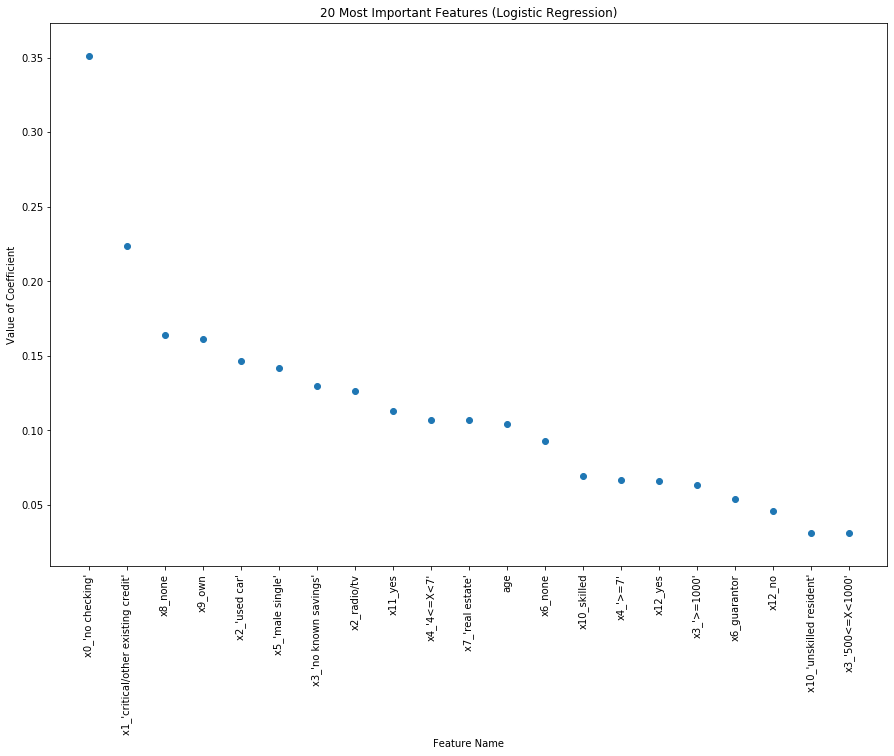

In [30]:
fig = plt.subplots(1,1,figsize=(15,10))
plt.scatter(top_coefs["Column Name"], top_coefs["Coefficient"] )
plt.xticks(rotation=90);
plt.xlabel("Feature Name");
plt.ylabel("Value of Coefficient");
plt.title("20 Most Important Features (Logistic Regression)");

Linear SVC

In [31]:
svc = LinearSVC(dual=False, C=0.01)
svm_ = make_pipeline(preprocess_all, svc)
svm_.fit(train_data_x, train_data_y)

x = ohe.fit(train_data_x[cat_cols])
cols = list(x.get_feature_names())
cols = cont_cols + cols
coef = list(svc.coef_[0])

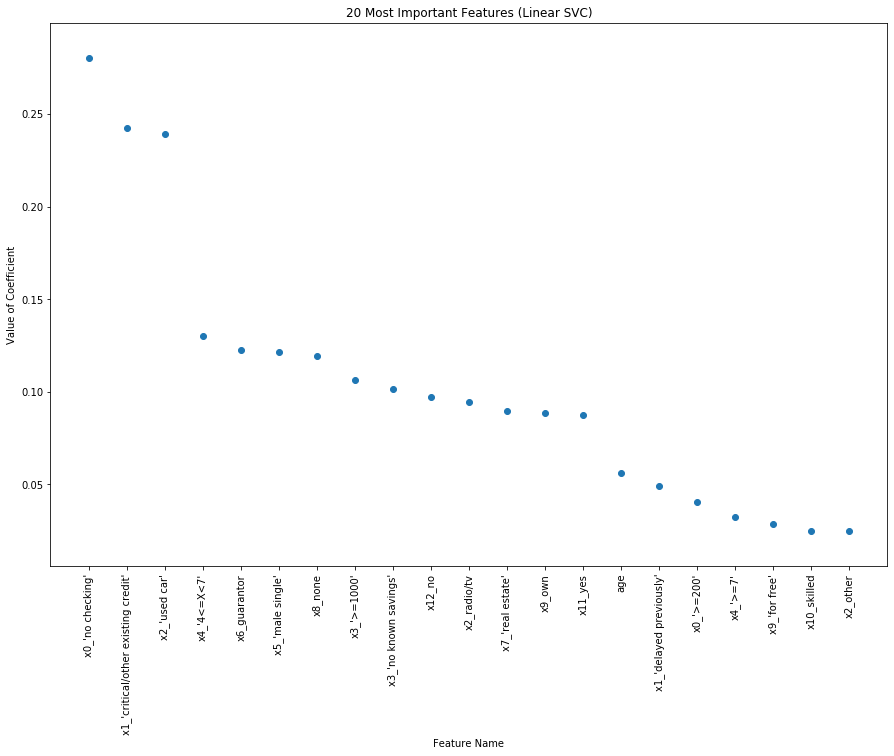

In [32]:
top_coefs = pd.DataFrame({"Column Name":cols, "Coefficient":coef})
top_coefs = top_coefs.sort_values(by=["Coefficient"], ascending=False).reset_index()
top_coefs = top_coefs.loc[:20, ]

fig = plt.subplots(1,1,figsize=(15,10))
plt.scatter(top_coefs["Column Name"], top_coefs["Coefficient"] )
plt.xticks(rotation=90);
plt.xlabel("Feature Name");
plt.ylabel("Value of Coefficient");
plt.title("20 Most Important Features (Linear SVC)");